In [1]:
# Step 1 - import and load dataset
import pandas as pd

data = pd.read_csv("Bank_Personal_Loan_Modelling(1).csv")
data.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [2]:
# Step 2 - check shape and basic info
print(data.shape)
data.info()


(5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [3]:
# Step 3 - remove duplicate rows if any
data = data.drop_duplicates()
print("After removing duplicates:", data.shape)


After removing duplicates: (5000, 14)


In [4]:
# Step 4 - check and handle missing values
print(data.isnull().sum())
# if there are nulls, handle them (drop or fill)
data = data.dropna()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [5]:
# Step 5 - clean column names
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()
data.head()


,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


#EXPLoratory DATA ANALYSIS

In [6]:
# Step 1 - basic stats and overview
print(data.shape)
print(data.columns)
data.describe()


(5000, 14)
Index(['id', 'age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')


,id,age,experience,income,zip_code,family,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


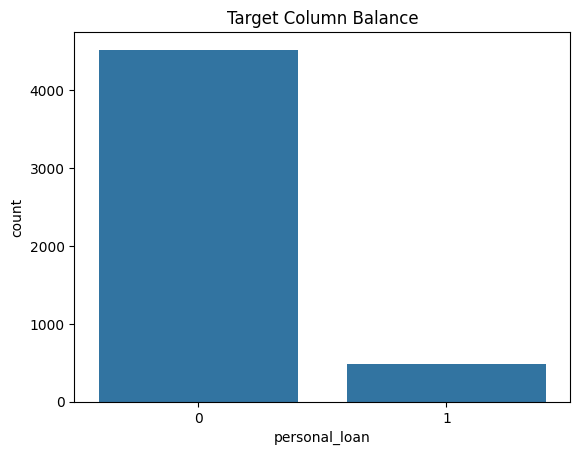

In [7]:
# Step 2 - target column balance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='personal_loan', data=data)
plt.title('Target Column Balance')
plt.show()


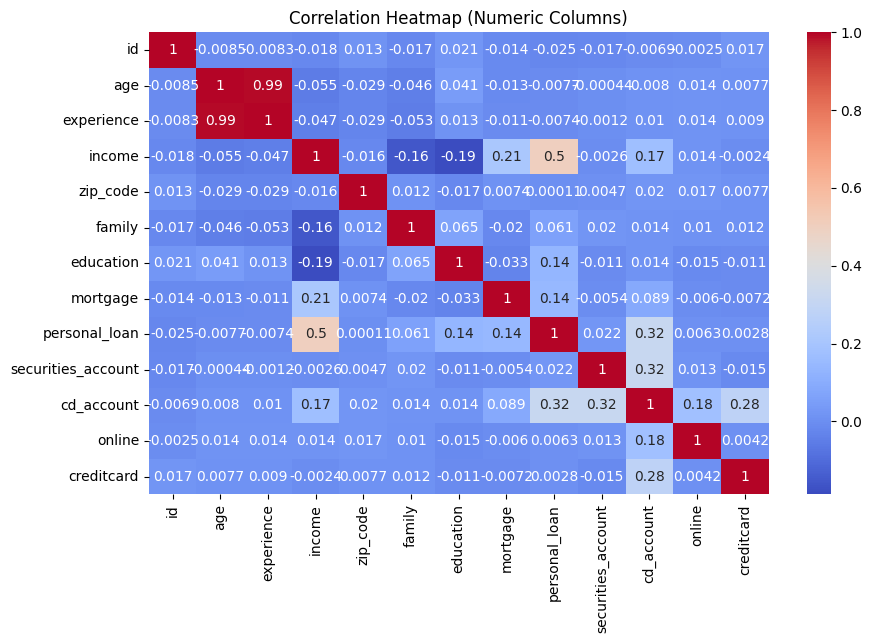

In [9]:
# Step 3 - correlation heatmap (numeric only)
plt.figure(figsize=(10,6))

# select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()


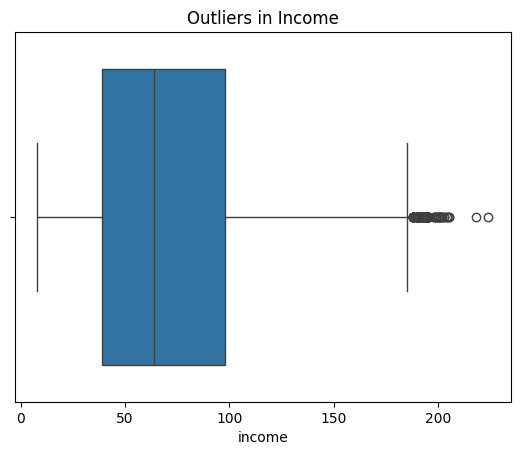

In [10]:
# Step 4 - check outliers using boxplot
sns.boxplot(x=data['income'])
plt.title('Outliers in Income')
plt.show()


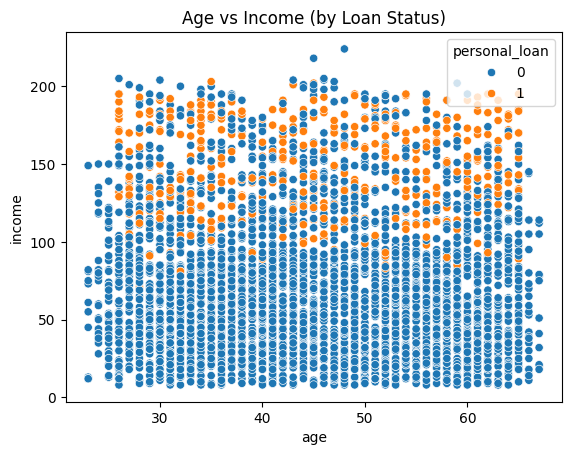

In [11]:
# Step 5 - plot Income vs Age
sns.scatterplot(x='age', y='income', hue='personal_loan', data=data)
plt.title('Age vs Income (by Loan Status)')
plt.show()


In [12]:
# Step 6 - recheck nulls and data types
print(data.isnull().sum())
print(data.dtypes)


id                    0
age                   0
experience            0
income                0
zip_code              0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
creditcard            0
dtype: int64
id                     int64
age                    int64
experience             int64
income                 int64
zip_code               int64
family                 int64
ccavg                 object
education              int64
mortgage               int64
personal_loan          int64
securities_account     int64
cd_account             int64
online                 int64
creditcard             int64
dtype: object


# TRAIN TEST SPLIT

In [13]:
# Step 1 - label encode categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

data.head()


,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,19,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,18,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,12,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,35,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,12,2,0,0,0,0,0,1


In [14]:
# define features and target
X = data.drop('personal_loan', axis=1)
y = data['personal_loan']


In [15]:
# Step 3 - train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape, X_test.shape)


(4000, 13) (1000, 13)


In [16]:
# Step 4 - scale numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
# Step 5 - apply SMOTE on training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())


Before SMOTE: {0: 3616, 1: 384}
After SMOTE: {0: 3616, 1: 3616}


# MODELS

In [18]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.91      0.94      0.92        96

    accuracy                           0.98      1000
   macro avg       0.95      0.96      0.96      1000
weighted avg       0.99      0.98      0.99      1000



In [19]:
# XGBoost Model
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:47:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.989
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.92      0.97      0.94        96

    accuracy                           0.99      1000
   macro avg       0.96      0.98      0.97      1000
weighted avg       0.99      0.99      0.99      1000



In [20]:
# Artificial Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential()
ann.add(Dense(32, activation='relu', input_dim=X_train_res.shape[1]))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(X_train_res, y_train_res, epochs=20, batch_size=32, verbose=1)

loss, acc = ann.evaluate(X_test, y_test)
print("ANN Test Accuracy:", acc)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7713 - loss: 0.5143
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9297 - loss: 0.1943
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9548 - loss: 0.1227
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.0986
Epoch 5/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9695 - loss: 0.0855
Epoch 6/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9730 - loss: 0.0842
Epoch 7/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9771 - loss: 0.0723
Epoch 8/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9785 - loss: 0.0638
Epoch 9/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9810 - loss: 0.0625
Epoch 10/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0615
Epoch 11/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9844 - loss: 0.0478
Epoch 12/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step